#### This analysis serves to investigate the analytical limitations to RVSearch. Specifically, the aim is to determine the minimum number of RV observations required to produce meaningful results. This work follows up on previous work to determine non-detectability bounaries via completeness contours, which serve to explore detectability as a function of various parameters such as planet mass and orbital separation. This work is also motivated by the need to strategically prioritze observation targets in order to efficiently allocate resources.

#### The HD 128311 system is known to host 2 exoplanets and is chosen for preliminary analysis. Data points are randomly removed from the RV time series data set and the delta BIC threshold is calculated. The threshold for the third planet search is then plotted against number of observations.

#### Tau Ceti is widely believed to host no exoplanets and is chosen for a follow up analysis following the same procedure.

##### Notes:

The Bayseian Information Criterion (BIC) is formally defined as:

#### ${\displaystyle \mathrm {BIC} =k\ln(n)-2\ln({\widehat {L}}).\ }$

where

- ${\displaystyle {\hat {L}}}$ = the maximized value of the likelihood function of the model 

- ${\displaystyle}M$, i.e. ${\displaystyle {\hat {L}}=p(x\mid {\widehat {\theta }},M)}$, where ${\displaystyle {\widehat {\theta }}}$ are the parameter values that maximize the likelihood function;

- ${\displaystyle x}$ = the observed data;

- ${\displaystyle n}$ = the number of data points in ${\displaystyle x}$, the number of observations, or equivalently, the sample size;

- ${\displaystyle k}$ = the number of parameters estimated by the model. For example, in multiple linear regression, the estimated parameters are the intercept, the ${\displaystyle q}$ slope parameters, and the constant variance of the errors; thus, ${\displaystyle k=q+2}.$

##### As number of observations decreases, the BIC decreases, but the max likelihood decreases as well. The first term contributes to a decreasing BIC and the second to an increasing BIC (as the max likelihood value decreases, the natural log term gets more negative and is subtracted from the first ln term).


##### Periodogram power, Z, is computed from a chi-squared test that compares N body model to N-1 body model. The distribution of powers affects the FAP calculation. As number of observations decreases, dBIC generally decreases and FAP increases. FAP is calculated by fitting a linear trendline to the log-scale histogram of powers greater than the median power. The less uniformly distributed the powers are in the histogram, the steeper the slope, the lower the FAP. So as Nobs decreases, that power distribution is becoming more uniformly distributed, it’s trendline slope decreases, and FAP increases (the line is extrapolated further out to a higher x-value).


In [1]:
import os

import rvsearch
from rvsearch import search, utils
import pandas as pd
import numpy as np
from numpy import random

import matplotlib.pyplot as plt

numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [16]:
data = utils.read_from_csv(os.path.join(rvsearch.DATADIR, 'HD128311.csv'), binsize=0.5)
#cadence : data = utils.read_from_csv('/home/collinc/rvsearch/example_data/HD128311.csv', binsize=0.5)

,jd,mnvel,errvel,tel
56,2.450984e+06,-19.060219,1.410924,b'k'
57,2.451200e+06,-27.602680,1.872257,b'k'
58,2.451343e+06,56.634960,2.151134,b'k'
59,2.451371e+06,99.547954,1.837661,b'k'
60,2.451410e+06,119.593456,1.570699,b'k'


In [ ]:
# Iteratively removes one data point for each run
while len(data) > 5:
    searcher = search.Search(data, starname='128311_linear{}'.format(len(data)), min_per=3,
                         workers=1, mcmc=False, verbose=True)
    searcher.run_search()
    drop_point = np.random.randint(len(data))
    data.drop([drop_point], inplace = True)
    data.reset_index(drop = True, inplace = True)

In [ ]:
# Exponential decay
while len(data) > 3:
    searcher = search.Search(data, starname='128311_exp{}'.format(len(data)), min_per=3,
                         workers=1, mcmc=False, verbose=False)
    searcher.run_search()
    for i in range(len(data)//2): #loop ensures the indices aren't repeated when dropping points.
        drop_point = np.random.randint(len(data))
        data.drop([drop_point], inplace = True)
        data.reset_index(drop = True, inplace = True)

In [ ]:
# workers = 1 for my comp
# workers = 32 for cadence
# directory on cadence: /home/collinc/rvsearch/example_data/HD128311.csv

### Trial 1 - Halve data

In [6]:
df_122 = pd.read_csv('/Users/collin/Desktop/projects/cps/rvsearch/threshold_exp_data/128311_exp122/thresholds_bics_faps.csv', delimiter = ' ')
df_122.drop(['best_bic', 'Unnamed: 4', 'fap'], axis = 1, inplace = True)
df_122.columns = (['threshold', 'best_bic', 'fap'])
df_122.head()

,threshold,best_bic,fap
0,28.691663,71.432952,1.873572e-11
1,27.677769,118.369509,1.432089e-20
2,30.772300,10.295465,3.195038e+00


In [7]:
df_61 = pd.read_csv('/Users/collin/Desktop/projects/cps/rvsearch/threshold_exp_data/128311_exp61/thresholds_bics_faps.csv', delimiter = ' ')
df_61.drop(['best_bic', 'Unnamed: 4', 'fap'], axis = 1, inplace = True)
df_61.columns = (['threshold', 'best_bic', 'fap'])
df_61.head()

,threshold,best_bic,fap
0,25.554380,25.960465,8.306482e-04
1,40.175362,71.471135,3.721862e-08
2,44.459995,18.048731,2.936092e+00


In [8]:
df_31 = pd.read_csv('/Users/collin/Desktop/projects/cps/rvsearch/threshold_exp_data/128311_exp31/thresholds_bics_faps.csv', delimiter = ' ')
df_31.drop(['best_bic', 'Unnamed: 4', 'fap'], axis = 1, inplace = True)
df_31.columns = (['threshold', 'best_bic', 'fap'])
df_31.head()

,threshold,best_bic,fap
0,25.124450,34.198221,0.000011
1,43.603481,58.765326,0.000009
2,100.831202,46.487764,2.718625


Text(0.5, 1.0, 'Threshold vs. n Observations')

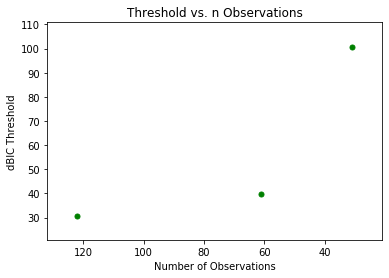

In [30]:
n_obs = [122, 61, 31]
thresholds = [df_122['threshold'][2], df_61['threshold'][2], df_31['threshold'][2]]

x = n_obs
y = thresholds
plt.plot(x, y, 'o', color = 'green')
plt.axis([max(x)+10, min(x)-10, min(y)-10, max(y)+10])
plt.xlabel('Number of Observations')
plt.ylabel('dBIC Threshold')
plt.title('Threshold vs. n Observations')

### Trial 2 - Halve data

In [27]:
df_122 = pd.read_csv('/Users/collin/Desktop/projects/cps/rvsearch/threshold_exp_data2/128311_exp122/thresholds_bics_faps.csv', delimiter = ' ')
df_122.drop(['best_bic', 'Unnamed: 4', 'fap'], axis = 1, inplace = True)
df_122.columns = (['threshold', 'best_bic', 'fap'])
df_122.head()

df_61 = pd.read_csv('/Users/collin/Desktop/projects/cps/rvsearch/threshold_exp_data2/128311_exp61/thresholds_bics_faps.csv', delimiter = ' ')
df_61.drop(['best_bic', 'Unnamed: 4', 'fap'], axis = 1, inplace = True)
df_61.columns = (['threshold', 'best_bic', 'fap'])
df_61.head()

,threshold,best_bic,fap
0,28.760487,41.104887,4.807033e-06
1,29.643104,51.011752,1.253927e-07
2,39.839726,13.525641,5.732080e+00


Text(0.5, 1.0, 'Threshold vs. n Observations')

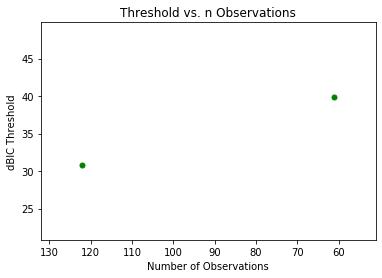

In [28]:
n_obs = [122, 61]
thresholds = [df_122['threshold'][2], df_61['threshold'][2]]

x = n_obs
y = thresholds
plt.plot(x, y, 'o', color = 'green')
plt.axis([max(x)+10, min(x)-10, min(y)-10, max(y)+10])
plt.xlabel('Number of Observations')
plt.ylabel('dBIC Threshold')
plt.title('Threshold vs. n Observations')

### Trial 1 - Linear

#### Internet dropped at 45 data points. The second planet was still detected with only 46 observations and wpuld have possibly been detected with fewer.

In [11]:
thresholds = []
nobs = np.arange(46,123)

for i in range(46,123):
    df = pd.read_csv('/Users/collin/Desktop/projects/cps/rvsearch/threshold_lin_data/128311_linear{}/thresholds_bics_faps.csv'.format(i), delimiter = ' ')
    df.drop(['best_bic', 'Unnamed: 4', 'fap'], axis = 1, inplace = True)
    df.columns = (['threshold', 'best_bic', 'fap'])
    thresholds.append(df['threshold'][2])

Text(0.5, 1.0, 'Threshold vs. n Observations')

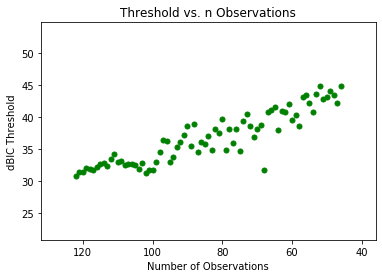

In [12]:
x = nobs
y = thresholds
plt.plot(x, y, 'o', color = 'green')
plt.axis([max(x)+10, min(x)-10, min(y)-10, max(y)+10])
plt.xlabel('Number of Observations')
plt.ylabel('dBIC Threshold')
plt.title('Threshold vs. n Observations')

### Trial 2 - Linear

#### The second planet was not detected with fewer than 49 observations. The observations qualitatively appear to be clustered more toward lower time values and more sparse at later time values.

#### For the run with 49 observations, the period and semi-amplitude roughly agreed between the two trials, however the eccentricities were significantly different. For trial 1, e = 0.11 and e = 0.33, for trial 2, e = 0.19 and e = 0.20 for planets 1 and 2 respectively. The values for 122 observations (maximum) is e = 0.18 and e = 0.29.

In [6]:
thresholds = []
nobs = np.arange(49,123)

for i in range(49,123):
    df = pd.read_csv('/Users/collin/Desktop/projects/cps/rvsearch/threshold_lin_data2/128311_linear{}/thresholds_bics_faps.csv'.format(i), delimiter = ' ')
    df.drop(['best_bic', 'Unnamed: 4', 'fap'], axis = 1, inplace = True)
    df.columns = (['threshold', 'best_bic', 'fap'])
    thresholds.append(df['threshold'][2])

Text(0.5, 1.0, 'Threshold vs. n Observations')

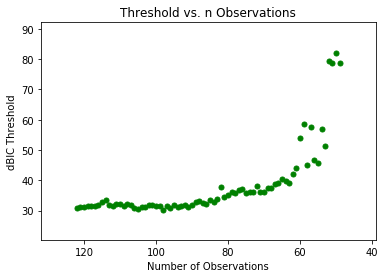

In [8]:
x = nobs
y = thresholds
plt.plot(x, y, 'o', color = 'green')
plt.axis([max(x)+10, min(x)-10, min(y)-10, max(y)+10])
plt.xlabel('Number of Observations')
plt.ylabel('dBIC Threshold')
plt.title('Threshold vs. n Observations')

### Tau Ceti Data

Text(0.5, 1.0, 'Threshold vs. n Observations')

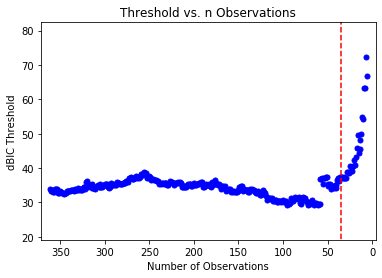

In [66]:
thresholds = []
thresholds_min = []
thresholds_diff = []
nobs = np.arange(6,363)

for i in range(6,363):
    df = pd.read_csv('/Users/collin/Desktop/projects/cps/rvsearch/threshold_tauceti_hires/tauceti{}/thresholds_bics_faps.csv'.format(i), delimiter = ' ')
    df.drop(['best_bic', 'Unnamed: 4', 'fap'], axis = 1, inplace = True)
    df.columns = (['threshold', 'best_bic', 'fap'])
    thresholds.append(df['threshold'][0])
    # Below is for calculating difference between dBIC threshold and minimum dBIC value
    df = pd.read_csv('/Users/collin/Desktop/projects/cps/rvsearch/threshold_tauceti_hires/tauceti{}/pers_periodograms.csv'.format(i), delimiter = ' ')
    df.drop(['Unnamed: 2', 'BIC_array'], axis = 1, inplace = True)
    df.columns = (['period', 'dbic'])
    thresholds_min.append(df['dbic'].min())
    thresholds_diff.append(thresholds[i-6]-thresholds_min[i-6])

x = nobs
y = thresholds_diff
plt.plot(x, y, 'bo')
plt.plot((35, 35),(10,100),'r--')
plt.axis([max(x)+10, min(x)-10, min(y)-10, max(y)+10])
plt.xlabel('Number of Observations')
plt.ylabel('dBIC Threshold')
plt.title('Threshold vs. n Observations')

### Tau Ceti Trial 2

Text(0.5, 1.0, 'Threshold vs. n Observations')

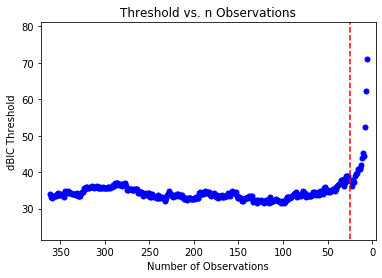

In [67]:
thresholds2 = []
thresholds_min2 = []
thresholds_diff2 = []
nobs = np.arange(6,363)

for i in range(6,363):
    df = pd.read_csv('/Users/collin/Desktop/projects/cps/rvsearch/threshold_tauceti_hires2/tauceti{}/thresholds_bics_faps.csv'.format(i), delimiter = ' ')
    df.drop(['best_bic', 'Unnamed: 4', 'fap'], axis = 1, inplace = True)
    df.columns = (['threshold', 'best_bic', 'fap'])
    thresholds2.append(df['threshold'][0])
        # Below is for calculating difference between dBIC threshold and minimum dBIC value
    df = pd.read_csv('/Users/collin/Desktop/projects/cps/rvsearch/threshold_tauceti_hires2/tauceti{}/pers_periodograms.csv'.format(i), delimiter = ' ')
    df.drop(['Unnamed: 2', 'BIC_array'], axis = 1, inplace = True)
    df.columns = (['period', 'dbic'])
    thresholds_min2.append(df['dbic'].min())
    thresholds_diff2.append(thresholds2[i-6]-thresholds_min2[i-6])
    
x = nobs
y = thresholds_diff2
plt.plot(x, y, 'bo')
plt.plot((25, 25),(10,100),'r--')
plt.axis([max(x)+10, min(x)-10, min(y)-10, max(y)+10])
plt.xlabel('Number of Observations')
plt.ylabel('dBIC Threshold')
plt.title('Threshold vs. n Observations')

### Tau Ceti Trial 3

Text(0.5, 1.0, 'Threshold vs. n Observations')

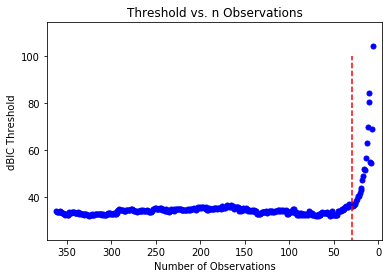

In [68]:
thresholds3 = []
thresholds_min3 = []
thresholds_diff3 = []
nobs = np.arange(6,363)

for i in range(6,363):
    df = pd.read_csv('/Users/collin/Desktop/projects/cps/rvsearch/threshold_tauceti_hires3/tauceti{}/thresholds_bics_faps.csv'.format(i), delimiter = ' ')
    df.drop(['best_bic', 'Unnamed: 4', 'fap'], axis = 1, inplace = True)
    df.columns = (['threshold', 'best_bic', 'fap'])
    thresholds3.append(df['threshold'][0])
    # Below is for calculating difference between dBIC threshold and minimum dBIC value
    df = pd.read_csv('/Users/collin/Desktop/projects/cps/rvsearch/threshold_tauceti_hires3/tauceti{}/pers_periodograms.csv'.format(i), delimiter = ' ')
    df.drop(['Unnamed: 2', 'BIC_array'], axis = 1, inplace = True)
    df.columns = (['period', 'dbic'])
    thresholds_min3.append(df['dbic'].min())
    thresholds_diff3.append(thresholds3[i-6]-thresholds_min3[i-6])
    
x = nobs
#y = thresholds3
y = thresholds_diff3
plt.plot(x, y, 'bo')
plt.plot((30, 30),(10,100),'r--')
plt.axis([max(x)+10, min(x)-10, min(y)-10, max(y)+10])
plt.xlabel('Number of Observations')
plt.ylabel('dBIC Threshold')
plt.title('Threshold vs. n Observations')

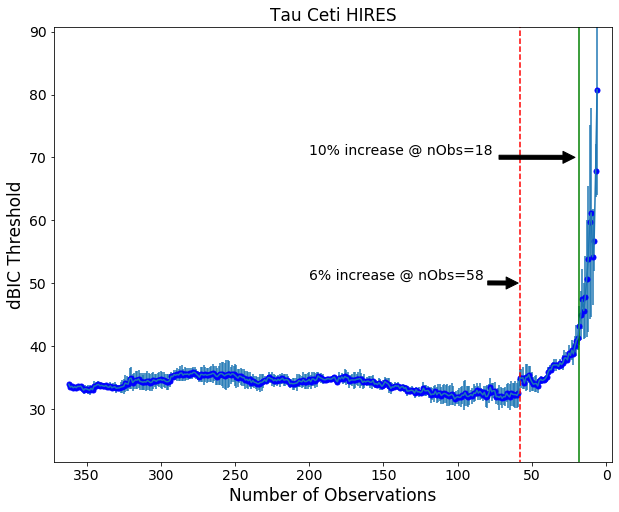

In [69]:
#Plot difference between dBIC threshold and min dBIC value for all HIRES data

thresh1 = np.asarray(thresholds_diff)
thresh2 = np.asarray(thresholds_diff2)
thresh3 = np.asarray(thresholds_diff3)

data = np.array([thresh1, thresh2, thresh3])
df_avg_diff_hires = pd.DataFrame(data = data, columns = np.arange(6, 363), index = ['thresholds1', 'thresholds2', 'thresholds3']).T
df_avg_diff_hires['avg_thresholds'] = df_avg_diff_hires.mean(axis = 1)
df_avg_diff_hires['std'] = df_avg_diff_hires.std(axis = 1)
df_avg_diff_hires['nobs'] = nobs

%matplotlib inline
fig, ax = plt.subplots(figsize = (10,8))
x = df_avg_diff_hires['nobs']
y = df_avg_diff_hires['avg_thresholds']
ax.plot(x, y, 'bo')
ax.errorbar(x, y, yerr = df_avg_diff_hires['std'])
ax.plot((18, 18),(10,100),'g-')
ax.plot((58, 58),(10,100),'r--')
ax.axis([max(x)+10, min(x)-10, min(y)-10, max(y)+10])
ax.set_xlabel('Number of Observations', size = 17)
ax.set_ylabel('dBIC Threshold', size = 17)
ax.set_title('Tau Ceti HIRES', size = 17)
ax.annotate('6% increase @ nObs=58', xy=(58, 50), xytext=(200, 50.5), size = 14,
            arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate('10% increase @ nObs=18', xy=(18, 70), xytext=(200, 70.5), size = 14,
            arrowprops=dict(facecolor='black', shrink=0.05))
ax.tick_params(axis='both', which='major', labelsize=14)
#plt.legend(shadow = True, prop={'size': 15})
#fig.savefig("tauceti_normalized_thresholds.pdf")

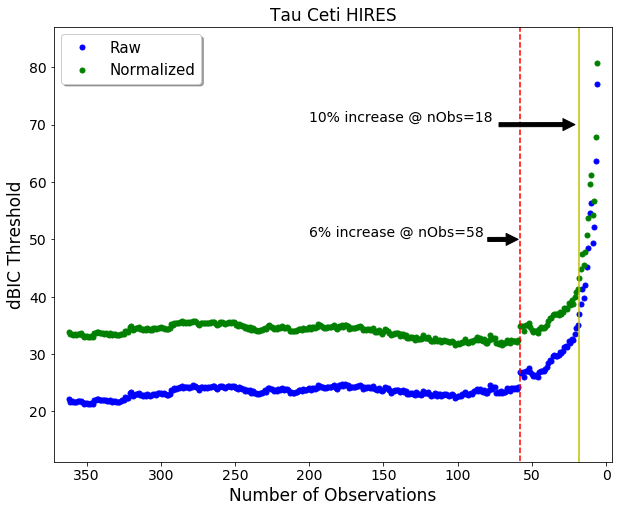

In [70]:
#NOTE: must execute 4 preceeding cells before executing this cell

thresh1 = np.asarray(thresholds)
thresh2 = np.asarray(thresholds2)
thresh3 = np.asarray(thresholds3)

data = np.array([thresh1, thresh2, thresh3])
df_avg_hires = pd.DataFrame(data = data, columns = np.arange(6, 363), index = ['thresholds1', 'thresholds2', 'thresholds3']).T
df_avg_hires['avg_thresholds'] = df_avg_hires.mean(axis = 1)
df_avg_hires['std'] = df_avg_hires.std(axis = 1)
df_avg_hires['nobs'] = nobs

%matplotlib inline
fig, ax = plt.subplots(figsize = (10,8))
x = df_avg_hires['nobs']
y = df_avg_hires['avg_thresholds']
ax.plot(x, y, 'bo', label = 'Raw')
#ax.errorbar(x, y, yerr = df_avg['std'])
ax.plot(df_avg_diff_hires['nobs'], df_avg_diff_hires['avg_thresholds'], 'go', label = 'Normalized')
#ax.errorbar(df_avg_diff['nobs'], df_avg_diff['avg_thresholds'], yerr = df_avg_diff['std'])
ax.plot((18, 18),(10,100),'y-')
ax.plot((58, 58),(10,100),'r--')
ax.axis([max(x)+10, min(x)-10, min(y)-10, max(y)+10])
ax.set_xlabel('Number of Observations', size = 17)
ax.set_ylabel('dBIC Threshold', size = 17)
ax.set_title('Tau Ceti HIRES', size = 17)
ax.annotate('6% increase @ nObs=58', xy=(58, 50), xytext=(200, 50.5), size = 14,
            arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate('10% increase @ nObs=18', xy=(18, 70), xytext=(200, 70.5), size = 14,
            arrowprops=dict(facecolor='black', shrink=0.05))
ax.tick_params(axis='both', which='major', labelsize=14)
plt.legend(shadow = True, prop={'size': 15})
#fig.savefig("tauceti_thresholds_comparison.png")

#fig_size = plt.rcParams["figure.figsize"]
#fig_size[0] = 10
#fig_size[1] = 8
#plt.rcParams["figure.figsize"] = fig_size

### The plot above was mistakenly thought to be observations from all telescopes when in fact it is only from HIRES (all dates).

In [72]:
# Calculates percent increase in dBIC threshold between data points
for i in range(0,100):
    dif = df_avg['avg_thresholds'].iloc[i-1] - df_avg['avg_thresholds'].iloc[i]
    percent_increase = dif/df_avg['avg_thresholds'].iloc[i]
    if percent_increase > 0.04:
        print("nObs:",df_avg['nobs'].iloc[i], "-> percent increase:", percent_increase*100)


nObs: 7 -> percent increase: 20.976468296833538
nObs: 8 -> percent increase: 21.97854755053679
nObs: 9 -> percent increase: 5.625118451857381
nObs: 12 -> percent increase: 12.640666879216472
nObs: 13 -> percent increase: 7.257987643704755
nObs: 14 -> percent increase: 7.457117768395037
nObs: 15 -> percent increase: 5.791731111306738
nObs: 17 -> percent increase: 6.898502875435778
nObs: 18 -> percent increase: 4.694010997961944
nObs: 19 -> percent increase: 5.501458188619262
nObs: 59 -> percent increase: 10.298728293706791
nObs: 79 -> percent increase: 4.229152260390421


This plot shows the delta BIC (dBIC) threshold corresponding to a 0.1% false alarm probability (FAP) vs. number of observations for Tau Ceti RV time series data collected by Keck HIRES. The data were generated from RV Search. The purpose of the investigation is to determine the minimum number of RV observations that will afford meaningful fits of Keplerian curves to the data. Tau Ceti was chosen because it has many observations (363), no known planets, and mild stellar activity. The dotted red line shows the most significant increase in dBIC threshold: 10% increase for nObs = 59. The solid green line shows the next most significant increase in dBIC threshold: 6% increase for nObs = 19. These points of interest were chosen as potentially meaningful in the context of the research question. All other increases greater than 4% occur for nObs < 19.

Lee and I are currently working to analyze the results presented here to explain the shape of the function. We would appreciate your input and any suggestions you might have.

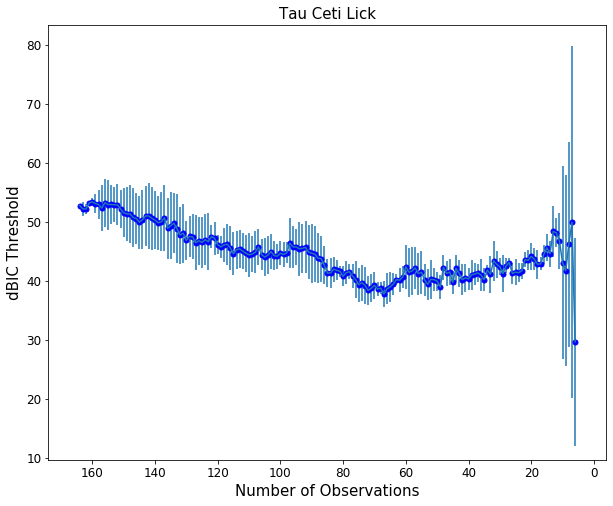

In [39]:
thresholds1 = []
thresholds_min1 = []
thresholds_diff1 = []
thresholds2 = []
thresholds_min2 = []
thresholds_diff2 = []
thresholds3 = []
thresholds_min3 = []
thresholds_diff3 = []

nobs = np.arange(6,165) #Set to number of observations in data

for i in range(6,165):
    df = pd.read_csv('/Users/collin/Desktop/projects/cps/rvsearch/threshold_tauceti_lick/tauceti{}/thresholds_bics_faps.csv'.format(i), delimiter = ' ')
    df.drop(['best_bic', 'Unnamed: 4', 'fap'], axis = 1, inplace = True)
    df.columns = (['threshold', 'best_bic', 'fap'])
    thresholds1.append(df['threshold'][0])
    # Below is for calculating difference between dBIC threshold and minimum dBIC value to normalize data
    df = pd.read_csv('/Users/collin/Desktop/projects/cps/rvsearch/threshold_tauceti_lick/tauceti{}/pers_periodograms.csv'.format(i), delimiter = ' ')
    df.drop(['Unnamed: 2', 'BIC_array'], axis = 1, inplace = True)
    df.columns = (['period', 'dbic'])
    thresholds_min1.append(df['dbic'].min())
    thresholds_diff1.append(thresholds1[i-6]-thresholds_min1[i-6])
    
    
for i in range(6,165):
    df = pd.read_csv('/Users/collin/Desktop/projects/cps/rvsearch/threshold_tauceti_lick2/tauceti{}/thresholds_bics_faps.csv'.format(i), delimiter = ' ')
    df.drop(['best_bic', 'Unnamed: 4', 'fap'], axis = 1, inplace = True)
    df.columns = (['threshold', 'best_bic', 'fap'])
    thresholds2.append(df['threshold'][0])
        # Below is for calculating difference between dBIC threshold and minimum dBIC value to normalize data
    df = pd.read_csv('/Users/collin/Desktop/projects/cps/rvsearch/threshold_tauceti_lick2/tauceti{}/pers_periodograms.csv'.format(i), delimiter = ' ')
    df.drop(['Unnamed: 2', 'BIC_array'], axis = 1, inplace = True)
    df.columns = (['period', 'dbic'])
    thresholds_min2.append(df['dbic'].min())
    thresholds_diff2.append(thresholds2[i-6]-thresholds_min2[i-6])
    
for i in range(6,165):
    df = pd.read_csv('/Users/collin/Desktop/projects/cps/rvsearch/threshold_tauceti_lick3/tauceti{}/thresholds_bics_faps.csv'.format(i), delimiter = ' ')
    df.drop(['best_bic', 'Unnamed: 4', 'fap'], axis = 1, inplace = True)
    df.columns = (['threshold', 'best_bic', 'fap'])
    thresholds3.append(df['threshold'][0])
        # Below is for calculating difference between dBIC threshold and minimum dBIC value to normalize data
    df = pd.read_csv('/Users/collin/Desktop/projects/cps/rvsearch/threshold_tauceti_lick3/tauceti{}/pers_periodograms.csv'.format(i), delimiter = ' ')
    df.drop(['Unnamed: 2', 'BIC_array'], axis = 1, inplace = True)
    df.columns = (['period', 'dbic'])
    thresholds_min3.append(df['dbic'].min())
    thresholds_diff3.append(thresholds3[i-6]-thresholds_min3[i-6])

t1 = np.asarray(thresholds_diff1)
t2 = np.asarray(thresholds_diff2)
t3 = np.asarray(thresholds_diff3)

data = np.array([t1, t2, t3])
df_avg_lick = pd.DataFrame(data = data, columns = np.arange(6,165), index = ['thresholds1', 'thresholds2', 'thresholds3']).T
df_avg_lick['avg_thresholds'] = df_avg_lick.mean(axis = 1)
df_avg_lick['std'] = df_avg_lick.std(axis = 1)
df_avg_lick['nobs'] = nobs
df_avg_lick.head()
    
%matplotlib inline
fig, ax = plt.subplots(figsize = (10,8))
x4 = df_avg_lick['nobs']
y4 = df_avg_lick['avg_thresholds']
ax.plot(x4, y4, 'bo')
ax.errorbar(x4, y4, yerr = df_avg_lick['std'])
ax.axis([max(x4)+10, min(x4)-10, min(y4)-20, max(y4)+30])
ax.set_xlabel('Number of Observations', size = 15)
ax.set_ylabel('dBIC Threshold', size = 15)
ax.set_title('Tau Ceti Lick', size = 15)
ax.tick_params(axis='both', which='major', labelsize=12)
#plt.legend(shadow = True, prop={'size': 15})
#fig.savefig("tauceti_norm_thresholds_lick.png")


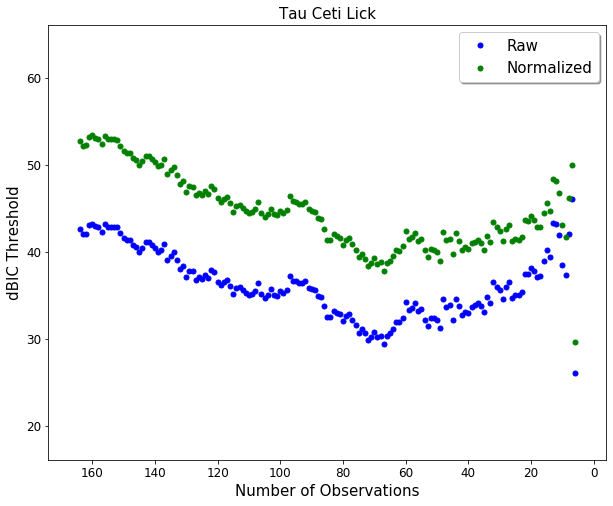

In [71]:
#Same as above but looking plotting difference between min dBIC and dBIC threshold
thresholds1 = []
thresholds_min1 = []
thresholds_diff1 = []
thresholds2 = []
thresholds_min2 = []
thresholds_diff2 = []
thresholds3 = []
thresholds_min3 = []
thresholds_diff3 = []
nobs = np.arange(6,165) #Set to number of observations in data

for i in range(0,159):
    df = pd.read_csv('/Users/collin/Desktop/projects/cps/rvsearch/threshold_tauceti_lick/tauceti{}/thresholds_bics_faps.csv'.format(i+6), delimiter = ' ')
    df.drop(['best_bic', 'Unnamed: 4', 'fap'], axis = 1, inplace = True)
    df.columns = (['threshold', 'best_bic', 'fap'])
    thresholds1.append(df['threshold'][0])
    
    df = pd.read_csv('/Users/collin/Desktop/projects/cps/rvsearch/threshold_tauceti_lick/tauceti{}/pers_periodograms.csv'.format(i+6), delimiter = ' ')
    df.drop(['Unnamed: 2', 'BIC_array'], axis = 1, inplace = True)
    df.columns = (['period', 'dbic'])
    thresholds_min1.append(df['dbic'].min())
    thresholds_diff1.append(thresholds1[i]-thresholds_min1[i])
    
for i in range(0,159):
    df = pd.read_csv('/Users/collin/Desktop/projects/cps/rvsearch/threshold_tauceti_lick2/tauceti{}/thresholds_bics_faps.csv'.format(i+6), delimiter = ' ')
    df.drop(['best_bic', 'Unnamed: 4', 'fap'], axis = 1, inplace = True)
    df.columns = (['threshold', 'best_bic', 'fap'])
    thresholds2.append(df['threshold'][0])
    
    df = pd.read_csv('/Users/collin/Desktop/projects/cps/rvsearch/threshold_tauceti_lick2/tauceti{}/pers_periodograms.csv'.format(i+6), delimiter = ' ')
    df.drop(['Unnamed: 2', 'BIC_array'], axis = 1, inplace = True)
    df.columns = (['period', 'dbic'])
    thresholds_min2.append(df['dbic'].min())
    thresholds_diff2.append(thresholds2[i]-thresholds_min2[i])
    
for i in range(0,159):
    df = pd.read_csv('/Users/collin/Desktop/projects/cps/rvsearch/threshold_tauceti_lick3/tauceti{}/thresholds_bics_faps.csv'.format(i+6), delimiter = ' ')
    df.drop(['best_bic', 'Unnamed: 4', 'fap'], axis = 1, inplace = True)
    df.columns = (['threshold', 'best_bic', 'fap'])
    thresholds3.append(df['threshold'][0])
    
    df = pd.read_csv('/Users/collin/Desktop/projects/cps/rvsearch/threshold_tauceti_lick3/tauceti{}/pers_periodograms.csv'.format(i+6), delimiter = ' ')
    df.drop(['Unnamed: 2', 'BIC_array'], axis = 1, inplace = True)
    df.columns = (['period', 'dbic'])
    thresholds_min3.append(df['dbic'].min())
    thresholds_diff3.append(thresholds3[i]-thresholds_min3[i])

t1 = np.asarray(thresholds1)
t2 = np.asarray(thresholds2)
t3 = np.asarray(thresholds3)

data = np.array([t1, t2, t3])
df_avg_lick = pd.DataFrame(data = data, columns = np.arange(0, 159), index = ['thresholds1', 'thresholds2', 'thresholds3']).T
df_avg_lick['avg_thresholds'] = df_avg_lick.mean(axis = 1)
df_avg_lick['std'] = df_avg_lick.std(axis = 1)
df_avg_lick['nobs'] = nobs

t1_diff = np.asarray(thresholds_diff1)
t2_diff = np.asarray(thresholds_diff2)
t3_diff = np.asarray(thresholds_diff3)

data_diff = np.array([t1_diff, t2_diff, t3_diff])
df_avg_diff_lick = pd.DataFrame(data = data_diff, columns = np.arange(0, 159), index = ['thresholds1', 'thresholds2', 'thresholds3']).T
df_avg_diff_lick['avg_thresholds'] = df_avg_diff_lick.mean(axis = 1)
df_avg_diff_lick['std'] = df_avg_diff_lick.std(axis = 1)
df_avg_diff_lick['nobs'] = nobs
    
%matplotlib inline
fig, ax = plt.subplots(figsize = (10,8))
x = df_avg_lick['nobs']
y = df_avg_lick['avg_thresholds']
ax.plot(x, y, 'bo', label = 'Raw')
#ax.errorbar(x, y, yerr = df_avg['std'])
ax.plot(df_avg_diff_lick['nobs'], df_avg_diff_lick['avg_thresholds'], 'go', label = 'Normalized')
#ax.errorbar(df_avg_diff['nobs'], df_avg_diff['avg_thresholds'], yerr = df_avg_diff['std'])
ax.axis([max(x)+10, min(x)-10, min(y)-10, max(y)+20])
ax.set_xlabel('Number of Observations', size = 15)
ax.set_ylabel('dBIC Threshold', size = 15)
ax.set_title('Tau Ceti Lick', size = 15)
ax.tick_params(axis='both', which='major', labelsize=12)
plt.legend(shadow = True, prop={'size': 15})
#fig.savefig("tauceti_lick_comparison.png")


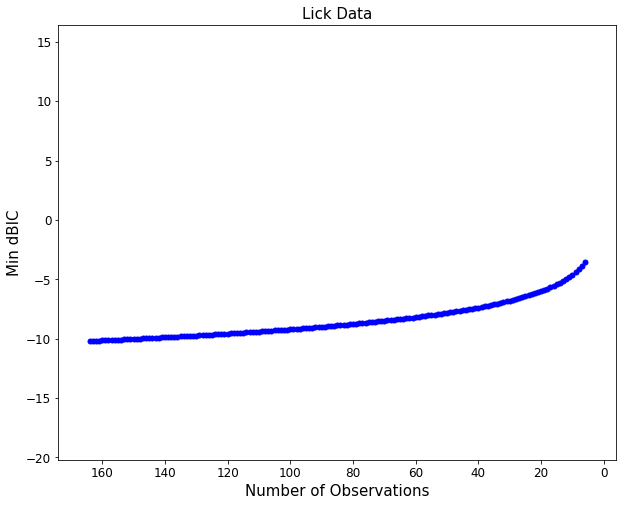

In [67]:
%matplotlib inline
fig, ax = plt.subplots(figsize = (10,8))
x = df_avg['nobs']
y = thresholds_min1
ax.plot(x, y, 'bo')
ax.axis([max(x)+10, min(x)-10, min(y)-10, max(y)+20])
ax.set_xlabel('Number of Observations', size = 15)
ax.set_ylabel('Min dBIC', size = 15)
ax.set_title('Lick Data', size = 15)
ax.tick_params(axis='both', which='major', labelsize=12)
#fig.savefig("tauceti_lick_comparison.png")

#### The last data point for nobs = 6 is interesting. The first run produced a very low dBIC threshold but the second two runs produced comparable values near 40. The periodograms are very similar for all three and show uniformity. The first run's threshold is surprising.

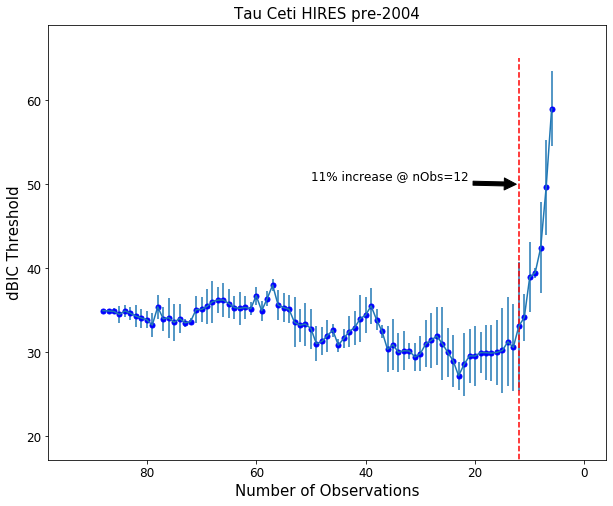

In [51]:
thresholds1 = []
thresholds_min1 = []
thresholds_diff1 = []
thresholds2 = []
thresholds_min2 = []
thresholds_diff2 = []
thresholds3 = []
thresholds_min3 = []
thresholds_diff3 = []
nobs = np.arange(6,89) #Set to number of observations in data

for i in range(6,89):
    df = pd.read_csv('/Users/collin/Desktop/projects/cps/rvsearch/threshold_tauceti_hiresrk/tauceti{}/thresholds_bics_faps.csv'.format(i), delimiter = ' ')
    df.drop(['best_bic', 'Unnamed: 4', 'fap'], axis = 1, inplace = True)
    df.columns = (['threshold', 'best_bic', 'fap'])
    thresholds1.append(df['threshold'][0])
            # Below is for calculating difference between dBIC threshold and minimum dBIC value to normalize data
    df = pd.read_csv('/Users/collin/Desktop/projects/cps/rvsearch/threshold_tauceti_hiresrk/tauceti{}/pers_periodograms.csv'.format(i), delimiter = ' ')
    df.drop(['Unnamed: 2', 'BIC_array'], axis = 1, inplace = True)
    df.columns = (['period', 'dbic'])
    thresholds_min1.append(df['dbic'].min())
    thresholds_diff1.append(thresholds1[i-6]-thresholds_min1[i-6])
    
for i in range(6,89):
    df = pd.read_csv('/Users/collin/Desktop/projects/cps/rvsearch/threshold_tauceti_hiresrk2/tauceti{}/thresholds_bics_faps.csv'.format(i), delimiter = ' ')
    df.drop(['best_bic', 'Unnamed: 4', 'fap'], axis = 1, inplace = True)
    df.columns = (['threshold', 'best_bic', 'fap'])
    thresholds2.append(df['threshold'][0])
            # Below is for calculating difference between dBIC threshold and minimum dBIC value to normalize data
    df = pd.read_csv('/Users/collin/Desktop/projects/cps/rvsearch/threshold_tauceti_hiresrk2/tauceti{}/pers_periodograms.csv'.format(i), delimiter = ' ')
    df.drop(['Unnamed: 2', 'BIC_array'], axis = 1, inplace = True)
    df.columns = (['period', 'dbic'])
    thresholds_min2.append(df['dbic'].min())
    thresholds_diff2.append(thresholds2[i-6]-thresholds_min2[i-6])
    
for i in range(6,89):
    df = pd.read_csv('/Users/collin/Desktop/projects/cps/rvsearch/threshold_tauceti_hiresrk3/tauceti{}/thresholds_bics_faps.csv'.format(i), delimiter = ' ')
    df.drop(['best_bic', 'Unnamed: 4', 'fap'], axis = 1, inplace = True)
    df.columns = (['threshold', 'best_bic', 'fap'])
    thresholds3.append(df['threshold'][0])
            # Below is for calculating difference between dBIC threshold and minimum dBIC value to normalize data
    df = pd.read_csv('/Users/collin/Desktop/projects/cps/rvsearch/threshold_tauceti_hiresrk3/tauceti{}/pers_periodograms.csv'.format(i), delimiter = ' ')
    df.drop(['Unnamed: 2', 'BIC_array'], axis = 1, inplace = True)
    df.columns = (['period', 'dbic'])
    thresholds_min3.append(df['dbic'].min())
    thresholds_diff3.append(thresholds3[i-6]-thresholds_min3[i-6])

t1 = np.asarray(thresholds_diff1)
t2 = np.asarray(thresholds_diff2)
t3 = np.asarray(thresholds_diff3)

data = np.array([t1, t2, t3])
df_avg_hiresrk = pd.DataFrame(data = data, columns = np.arange(6,89), index = ['thresholds1', 'thresholds2', 'thresholds3']).T
df_avg_hiresrk['avg_thresholds'] = df_avg_hiresrk.mean(axis = 1)
df_avg_hiresrk['std'] = df_avg_hiresrk.std(axis = 1)
df_avg_hiresrk['nobs'] = nobs
    
%matplotlib inline
fig, ax = plt.subplots(figsize = (10,8))
x2 = df_avg_hiresrk['nobs']
y2 = df_avg_hiresrk['avg_thresholds']
ax.plot(x2, y2, 'bo')
ax.errorbar(x2, y2, yerr = df_avg_hiresrk['std'])
ax.plot((12, 12), (10, 65), 'r--')
ax.axis([max(x2)+10, min(x2)-10, min(y2)-10, max(y2)+10])
ax.set_xlabel('Number of Observations', size = 15)
ax.set_ylabel('dBIC Threshold', size = 15)
ax.set_title('Tau Ceti HIRES pre-2004', size = 15)
ax.annotate('11% increase @ nObs=12', xy=(12, 50), xytext=(50, 50.5), size = 12,
            arrowprops=dict(facecolor='black', shrink=0.05))
ax.tick_params(axis='both', which='major', labelsize=12)
#plt.legend(shadow = True, prop={'size': 15})
#fig.savefig("tauceti_norm_thresholds_hiresrk.png")


In [76]:
# Calculates percent increase in dBIC threshold between data points
for i in range(0,60):
    dif = df_avg['avg_thresholds'].iloc[i-1] - df_avg['avg_thresholds'].iloc[i]
    percent_increase = dif/df_avg['avg_thresholds'].iloc[i]
    if percent_increase > 0.04:
        print("nObs:",df_avg['nobs'].iloc[i], "-> percent increase:", percent_increase*100)

nObs: 7 -> percent increase: 21.108742488410538
nObs: 8 -> percent increase: 19.471074722643507
nObs: 9 -> percent increase: 9.0641618303907
nObs: 11 -> percent increase: 16.963570432385243
nObs: 12 -> percent increase: 4.276870918767334
nObs: 13 -> percent increase: 10.553442068111856
nObs: 15 -> percent increase: 4.719781083597072
nObs: 22 -> percent increase: 4.951129179013569
nObs: 23 -> percent increase: 6.906165550938309
nObs: 30 -> percent increase: 5.331108516893728
nObs: 40 -> percent increase: 4.229832646943725
nObs: 42 -> percent increase: 4.3851235967318605
nObs: 58 -> percent increase: 5.892696666969655
nObs: 59 -> percent increase: 5.431796132122728
nObs: 61 -> percent increase: 5.8978916531526355


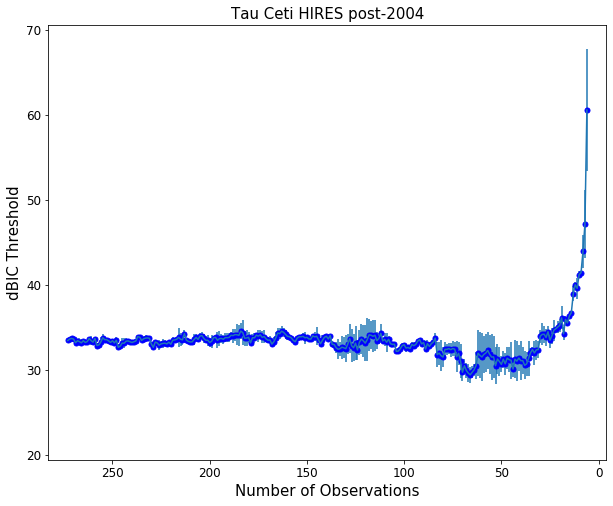

In [48]:
thresholds1 = []
thresholds_min1 = []
thresholds_diff1 = []
thresholds2 = []
thresholds_min2 = []
thresholds_diff2 = []
thresholds3 = []
thresholds_min3 = []
thresholds_diff3 = []
nobs = np.arange(6,274) #Set to number of observations in data
    
for i in range(6,274):
    df = pd.read_csv('/Users/collin/Desktop/projects/cps/rvsearch/threshold_tauceti_hiresrj2/tauceti{}/thresholds_bics_faps.csv'.format(i), delimiter = ' ')
    df.drop(['best_bic', 'Unnamed: 4', 'fap'], axis = 1, inplace = True)
    df.columns = (['threshold', 'best_bic', 'fap'])
    thresholds2.append(df['threshold'][0])
    # Below is for calculating difference between dBIC threshold and minimum dBIC value to normalize data
    df = pd.read_csv('/Users/collin/Desktop/projects/cps/rvsearch/threshold_tauceti_hiresrj2/tauceti{}/pers_periodograms.csv'.format(i), delimiter = ' ')
    df.drop(['Unnamed: 2', 'BIC_array'], axis = 1, inplace = True)
    df.columns = (['period', 'dbic'])
    thresholds_min2.append(df['dbic'].min())
    thresholds_diff2.append(thresholds2[i-6]-thresholds_min2[i-6])
    
for i in range(6,274):
    df = pd.read_csv('/Users/collin/Desktop/projects/cps/rvsearch/threshold_tauceti_hiresrj3/tauceti{}/thresholds_bics_faps.csv'.format(i), delimiter = ' ')
    df.drop(['best_bic', 'Unnamed: 4', 'fap'], axis = 1, inplace = True)
    df.columns = (['threshold', 'best_bic', 'fap'])
    thresholds3.append(df['threshold'][0])
     # Below is for calculating difference between dBIC threshold and minimum dBIC value to normalize data
    df = pd.read_csv('/Users/collin/Desktop/projects/cps/rvsearch/threshold_tauceti_hiresrj3/tauceti{}/pers_periodograms.csv'.format(i), delimiter = ' ')
    df.drop(['Unnamed: 2', 'BIC_array'], axis = 1, inplace = True)
    df.columns = (['period', 'dbic'])
    thresholds_min3.append(df['dbic'].min())
    thresholds_diff3.append(thresholds3[i-6]-thresholds_min3[i-6])

t2 = np.asarray(thresholds_diff2)
t3 = np.asarray(thresholds_diff3)

data = np.array([t2, t3])
df_avg_hiresrj = pd.DataFrame(data = data, columns = np.arange(6,274), index = ['thresholds2', 'thresholds3']).T
df_avg_hiresrj['avg_thresholds'] = df_avg_hiresrj.mean(axis = 1)
df_avg_hiresrj['std'] = df_avg_hiresrj.std(axis = 1)
df_avg_hiresrj['nobs'] = nobs

    
%matplotlib inline
fig, ax = plt.subplots(figsize = (10,8))
x3 = df_avg_hiresrj['nobs']
y3 = df_avg_hiresrj['avg_thresholds']
ax.plot(x3, y3, 'bo')
ax.errorbar(x3, y3, yerr = df_avg_hiresrj['std'])
ax.axis([max(x3)+10, min(x3)-10, min(y3)-10, max(y3)+10])
ax.set_xlabel('Number of Observations', size = 15)
ax.set_ylabel('dBIC Threshold', size = 15)
ax.set_title('Tau Ceti HIRES post-2004', size = 15)
ax.tick_params(axis='both', which='major', labelsize=12)
#plt.legend(shadow = True, prop={'size': 15})
#fig.savefig("tauceti_norm_thresholds_hiresrj.png")


In [33]:
# Calculates percent increase in dBIC threshold between data points
for i in range(0,100):
    dif = df_avg['avg_thresholds'].iloc[i-1] - df_avg['avg_thresholds'].iloc[i]
    percent_increase = dif/df_avg['avg_thresholds'].iloc[i]
    if percent_increase > 0.04:
        print("nObs:",df_avg['nobs'].iloc[i], "-> percent increase:", percent_increase*100)

nObs: 7 -> percent increase: 28.491221395968903
nObs: 8 -> percent increase: 7.273958624318734
nObs: 9 -> percent increase: 6.0357638473901645
nObs: 11 -> percent increase: 4.077141224080059
nObs: 14 -> percent increase: 6.027481446130095
nObs: 18 -> percent increase: 4.935159026875398
nObs: 31 -> percent increase: 4.818967643290191
nObs: 63 -> percent increase: 4.73930446575308


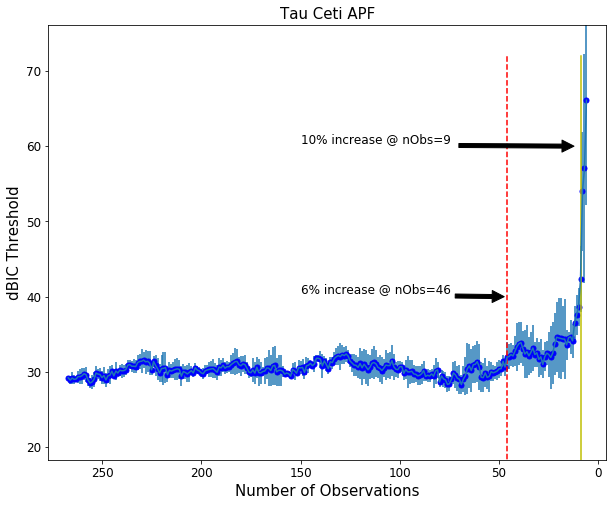

In [2]:
thresholds1 = []
thresholds_min1 = []
thresholds_diff1 = []
thresholds2 = []
thresholds_min2 = []
thresholds_diff2 = []
thresholds3 = []
thresholds_min3 = []
thresholds_diff3 = []
nobs = np.arange(6,268) #Set to number of observations in data

for i in range(6,268):
    df = pd.read_csv('/Users/collin/Desktop/projects/cps/rvsearch/threshold_tauceti_apf/tauceti{}/thresholds_bics_faps.csv'.format(i), delimiter = ' ')
    df.drop(['best_bic', 'Unnamed: 4', 'fap'], axis = 1, inplace = True)
    df.columns = (['threshold', 'best_bic', 'fap'])
    thresholds1.append(df['threshold'][0])
        # Below is for calculating difference between dBIC threshold and minimum dBIC value to normalize data
    df = pd.read_csv('/Users/collin/Desktop/projects/cps/rvsearch/threshold_tauceti_apf/tauceti{}/pers_periodograms.csv'.format(i), delimiter = ' ')
    df.drop(['Unnamed: 2', 'BIC_array'], axis = 1, inplace = True)
    df.columns = (['period', 'dbic'])
    thresholds_min1.append(df['dbic'].min())
    thresholds_diff1.append(thresholds1[i-6]-thresholds_min1[i-6])
    
for i in range(6,268):
    df = pd.read_csv('/Users/collin/Desktop/projects/cps/rvsearch/threshold_tauceti_apf2/tauceti{}/thresholds_bics_faps.csv'.format(i), delimiter = ' ')
    df.drop(['best_bic', 'Unnamed: 4', 'fap'], axis = 1, inplace = True)
    df.columns = (['threshold', 'best_bic', 'fap'])
    thresholds2.append(df['threshold'][0])
        # Below is for calculating difference between dBIC threshold and minimum dBIC value to normalize data
    df = pd.read_csv('/Users/collin/Desktop/projects/cps/rvsearch/threshold_tauceti_apf2/tauceti{}/pers_periodograms.csv'.format(i), delimiter = ' ')
    df.drop(['Unnamed: 2', 'BIC_array'], axis = 1, inplace = True)
    df.columns = (['period', 'dbic'])
    thresholds_min2.append(df['dbic'].min())
    thresholds_diff2.append(thresholds2[i-6]-thresholds_min2[i-6])
    
for i in range(6,268):
    df = pd.read_csv('/Users/collin/Desktop/projects/cps/rvsearch/threshold_tauceti_apf3/tauceti{}/thresholds_bics_faps.csv'.format(i), delimiter = ' ')
    df.drop(['best_bic', 'Unnamed: 4', 'fap'], axis = 1, inplace = True)
    df.columns = (['threshold', 'best_bic', 'fap'])
    thresholds3.append(df['threshold'][0])
        # Below is for calculating difference between dBIC threshold and minimum dBIC value to normalize data
    df = pd.read_csv('/Users/collin/Desktop/projects/cps/rvsearch/threshold_tauceti_apf3/tauceti{}/pers_periodograms.csv'.format(i), delimiter = ' ')
    df.drop(['Unnamed: 2', 'BIC_array'], axis = 1, inplace = True)
    df.columns = (['period', 'dbic'])
    thresholds_min3.append(df['dbic'].min())
    thresholds_diff3.append(thresholds3[i-6]-thresholds_min3[i-6])

t1 = np.asarray(thresholds_diff1)
t2 = np.asarray(thresholds_diff2)
t3 = np.asarray(thresholds_diff3)

data = np.array([t1, t2, t3])
df_avg_apf = pd.DataFrame(data = data, columns = np.arange(6,268), index = ['thresholds1', 'thresholds2', 'thresholds3']).T
df_avg_apf['avg_thresholds'] = df_avg_apf.mean(axis = 1)
df_avg_apf['std'] = df_avg_apf.std(axis = 1)
df_avg_apf['nobs'] = nobs
df_avg_apf.head()
    
%matplotlib inline
fig, ax = plt.subplots(figsize = (10,8))
x1 = df_avg_apf['nobs']
y1 = df_avg_apf['avg_thresholds']
ax.plot(x1, y1, 'bo')
ax.errorbar(x1, y1, yerr = df_avg_apf['std'])
ax.plot((46,46),(5,72), 'r--')
ax.plot((9,9),(5,72), 'y-')
ax.axis([max(x1)+10, min(x1)-10, min(y1)-10, max(y1)+10])
ax.set_xlabel('Number of Observations', size = 15)
ax.set_ylabel('dBIC Threshold', size = 15)
ax.set_title('Tau Ceti APF', size = 15)
ax.annotate('6% increase @ nObs=46', xy=(46, 40), xytext=(150, 40.5), size = 12,
            arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate('10% increase @ nObs=9', xy=(9, 60), xytext=(150, 60.5), size = 12,
            arrowprops=dict(facecolor='black', shrink=0.05))
ax.tick_params(axis='both', which='major', labelsize=12)
#plt.legend(shadow = True, prop={'size': 15})
#fig.savefig("tauceti_norm_thresholds_apf.png")

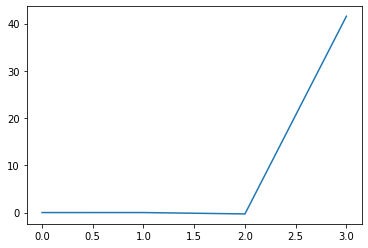

In [4]:
func = np.poly1d(np.polyfit(x1,y1,2))
plt.plot(func)

In [71]:
# Calculates percent increase in dBIC threshold between data points
for i in range(0,100):
    dif = df_avg['avg_thresholds'].iloc[i-1] - df_avg['avg_thresholds'].iloc[i]
    percent_increase = dif/df_avg['avg_thresholds'].iloc[i]
    if percent_increase > 0.04:
        print("nObs:",df_avg['nobs'].iloc[i], "-> percent increase:", percent_increase*100)

nObs: 7 -> percent increase: 17.54192994034412
nObs: 8 -> percent increase: 6.744522271482984
nObs: 9 -> percent increase: 31.387434445103203
nObs: 10 -> percent increase: 11.437314955508464
nObs: 11 -> percent increase: 4.010976320558466
nObs: 13 -> percent increase: 8.492566419543685
nObs: 23 -> percent increase: 4.922522466042233
nObs: 28 -> percent increase: 4.537443548644102
nObs: 47 -> percent increase: 5.883613393873615
nObs: 49 -> percent increase: 4.453065290716812
nObs: 67 -> percent increase: 4.4920016304199875
nObs: 74 -> percent increase: 4.264075793019987
nObs: 80 -> percent increase: 4.137711728628554


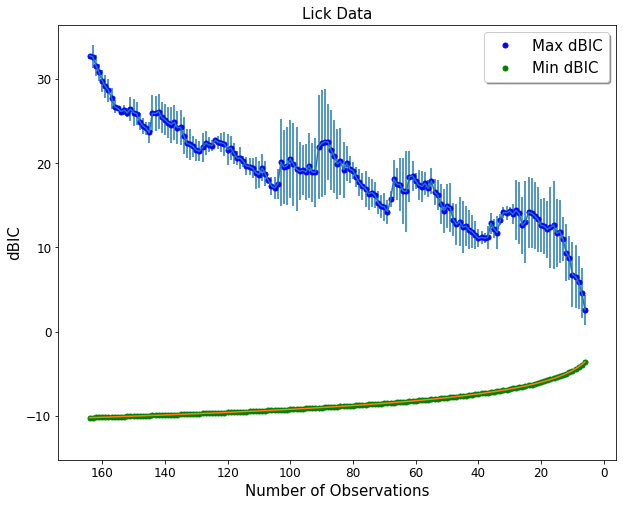

In [115]:
#Same as above but looking plotting difference between min dBIC and dBIC threshold
thresholds_max1 = []
thresholds_min1 = []
thresholds_max2 = []
thresholds_min2 = []
thresholds_max3 = []
thresholds_min3 = []
nobs = np.arange(6,165) #Set to number of observations in data

for i in range(0,159):
    df = pd.read_csv('/Users/collin/Desktop/projects/cps/rvsearch/threshold_tauceti_lick/tauceti{}/thresholds_bics_faps.csv'.format(i+6), delimiter = ' ')
    df.drop(['best_bic', 'Unnamed: 4', 'fap'], axis = 1, inplace = True)
    df.columns = (['threshold', 'best_bic', 'fap'])
    thresholds_max1.append(df['best_bic'][0])
    
    df = pd.read_csv('/Users/collin/Desktop/projects/cps/rvsearch/threshold_tauceti_lick/tauceti{}/pers_periodograms.csv'.format(i+6), delimiter = ' ')
    df.drop(['Unnamed: 2', 'BIC_array'], axis = 1, inplace = True)
    df.columns = (['period', 'dbic'])
    thresholds_min1.append(df['dbic'].min())
    
for i in range(0,159):
    df = pd.read_csv('/Users/collin/Desktop/projects/cps/rvsearch/threshold_tauceti_lick2/tauceti{}/thresholds_bics_faps.csv'.format(i+6), delimiter = ' ')
    df.drop(['best_bic', 'Unnamed: 4', 'fap'], axis = 1, inplace = True)
    df.columns = (['threshold', 'best_bic', 'fap'])
    thresholds_max2.append(df['best_bic'][0])
    
    df = pd.read_csv('/Users/collin/Desktop/projects/cps/rvsearch/threshold_tauceti_lick2/tauceti{}/pers_periodograms.csv'.format(i+6), delimiter = ' ')
    df.drop(['Unnamed: 2', 'BIC_array'], axis = 1, inplace = True)
    df.columns = (['period', 'dbic'])
    thresholds_min2.append(df['dbic'].min())
    
for i in range(0,159):
    df = pd.read_csv('/Users/collin/Desktop/projects/cps/rvsearch/threshold_tauceti_lick3/tauceti{}/thresholds_bics_faps.csv'.format(i+6), delimiter = ' ')
    df.drop(['best_bic', 'Unnamed: 4', 'fap'], axis = 1, inplace = True)
    df.columns = (['threshold', 'best_bic', 'fap'])
    thresholds_max3.append(df['best_bic'][0])
    
    df = pd.read_csv('/Users/collin/Desktop/projects/cps/rvsearch/threshold_tauceti_lick3/tauceti{}/pers_periodograms.csv'.format(i+6), delimiter = ' ')
    df.drop(['Unnamed: 2', 'BIC_array'], axis = 1, inplace = True)
    df.columns = (['period', 'dbic'])
    thresholds_min3.append(df['dbic'].min())

t1 = np.asarray(thresholds_max1)
t2 = np.asarray(thresholds_max2)
t3 = np.asarray(thresholds_max3)

data_max = np.array([t1, t2, t3])
df_avg_max = pd.DataFrame(data = data_max, columns = np.arange(0, 159), index = ['thresholds1', 'thresholds2', 'thresholds3']).T
df_avg_max['avg_thresholds'] = df_avg_max.mean(axis = 1)
df_avg_max['std'] = df_avg_max.std(axis = 1)
df_avg_max['nobs'] = nobs

t1_min = np.asarray(thresholds_min1)
t2_min = np.asarray(thresholds_min2)
t3_min = np.asarray(thresholds_min3)

data_min = np.array([t1_min, t2_min, t3_min])
df_avg_min = pd.DataFrame(data = data_min, columns = np.arange(0, 159), index = ['thresholds1', 'thresholds2', 'thresholds3']).T
df_avg_min['avg_thresholds'] = df_avg_min.mean(axis = 1)
df_avg_min['std'] = df_avg_min.std(axis = 1)
df_avg_min['nobs'] = nobs
    
%matplotlib inline
fig, ax = plt.subplots(figsize = (10,8))
ax.plot(df_avg_max['nobs'], df_avg_max['avg_thresholds'], 'bo', label = 'Max dBIC')
ax.errorbar(df_avg_max['nobs'], df_avg_max['avg_thresholds'], yerr = df_avg_max['std'])
ax.plot(df_avg_min['nobs'], df_avg_min['avg_thresholds'], 'go', label = 'Min dBIC')
ax.errorbar(df_avg_min['nobs'], df_avg_min['avg_thresholds'], yerr = df_avg_min['std'])
ax.axis([max(df_avg_max['nobs'])+10, min(df_avg_max['nobs'])-10, 
         min(df_avg_min['avg_thresholds'])-5, max(df_avg_min['avg_thresholds'])+40])
ax.set_xlabel('Number of Observations', size = 15)
ax.set_ylabel('dBIC', size = 15)
ax.set_title('Lick Data', size = 15)
ax.tick_params(axis='both', which='major', labelsize=12)
plt.legend(shadow = True, prop={'size': 15})
fig.savefig("tauceti_lick_minmax.png")


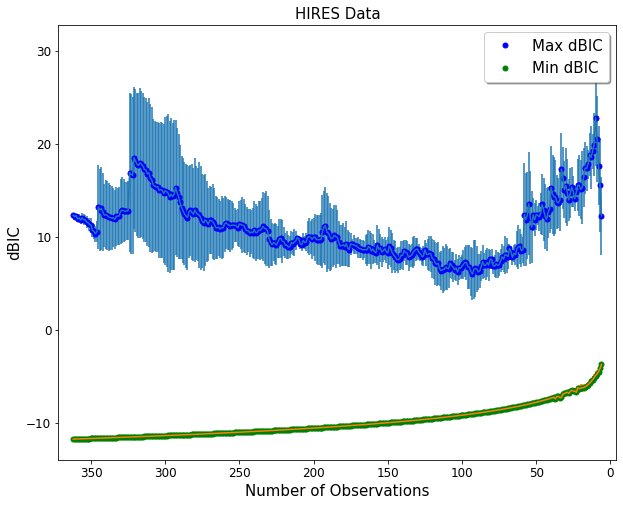

In [112]:
#Same as above but looking plotting difference between min dBIC and dBIC threshold
thresholds_max1 = []
thresholds_min1 = []
thresholds_max2 = []
thresholds_min2 = []
thresholds_max3 = []
thresholds_min3 = []
nobs = np.arange(6,363) #Set to number of observations in data

for i in range(0,357):
    df = pd.read_csv('/Users/collin/Desktop/projects/cps/rvsearch/threshold_tauceti_hires/tauceti{}/thresholds_bics_faps.csv'.format(i+6), delimiter = ' ')
    df.drop(['best_bic', 'Unnamed: 4', 'fap'], axis = 1, inplace = True)
    df.columns = (['threshold', 'best_bic', 'fap'])
    thresholds_max1.append(df['best_bic'][0])
    
    df = pd.read_csv('/Users/collin/Desktop/projects/cps/rvsearch/threshold_tauceti_hires/tauceti{}/pers_periodograms.csv'.format(i+6), delimiter = ' ')
    df.drop(['Unnamed: 2', 'BIC_array'], axis = 1, inplace = True)
    df.columns = (['period', 'dbic'])
    thresholds_min1.append(df['dbic'].min())
    
for i in range(0,357):
    df = pd.read_csv('/Users/collin/Desktop/projects/cps/rvsearch/threshold_tauceti_hires2/tauceti{}/thresholds_bics_faps.csv'.format(i+6), delimiter = ' ')
    df.drop(['best_bic', 'Unnamed: 4', 'fap'], axis = 1, inplace = True)
    df.columns = (['threshold', 'best_bic', 'fap'])
    thresholds_max2.append(df['best_bic'][0])
    
    df = pd.read_csv('/Users/collin/Desktop/projects/cps/rvsearch/threshold_tauceti_hires2/tauceti{}/pers_periodograms.csv'.format(i+6), delimiter = ' ')
    df.drop(['Unnamed: 2', 'BIC_array'], axis = 1, inplace = True)
    df.columns = (['period', 'dbic'])
    thresholds_min2.append(df['dbic'].min())
    
for i in range(0,357):
    df = pd.read_csv('/Users/collin/Desktop/projects/cps/rvsearch/threshold_tauceti_hires3/tauceti{}/thresholds_bics_faps.csv'.format(i+6), delimiter = ' ')
    df.drop(['best_bic', 'Unnamed: 4', 'fap'], axis = 1, inplace = True)
    df.columns = (['threshold', 'best_bic', 'fap'])
    thresholds_max3.append(df['best_bic'][0])
    
    df = pd.read_csv('/Users/collin/Desktop/projects/cps/rvsearch/threshold_tauceti_hires3/tauceti{}/pers_periodograms.csv'.format(i+6), delimiter = ' ')
    df.drop(['Unnamed: 2', 'BIC_array'], axis = 1, inplace = True)
    df.columns = (['period', 'dbic'])
    thresholds_min3.append(df['dbic'].min())

t1 = np.asarray(thresholds_max1)
t2 = np.asarray(thresholds_max2)
t3 = np.asarray(thresholds_max3)

data_max = np.array([t1, t2, t3])
df_avg_max = pd.DataFrame(data = data_max, columns = np.arange(0, 357), index = ['thresholds1', 'thresholds2', 'thresholds3']).T
df_avg_max['avg_thresholds'] = df_avg_max.mean(axis = 1)
df_avg_max['std'] = df_avg_max.std(axis = 1)
df_avg_max['nobs'] = nobs

t1_min = np.asarray(thresholds_min1)
t2_min = np.asarray(thresholds_min2)
t3_min = np.asarray(thresholds_min3)

data_min = np.array([t1_min, t2_min, t3_min])
df_avg_min = pd.DataFrame(data = data_min, columns = np.arange(0, 357), index = ['thresholds1', 'thresholds2', 'thresholds3']).T
df_avg_min['avg_thresholds'] = df_avg_min.mean(axis = 1)
df_avg_min['std'] = df_avg_min.std(axis = 1)
df_avg_min['nobs'] = nobs
    
%matplotlib inline
fig, ax = plt.subplots(figsize = (10,8))
x = df_avg_max['nobs']
y = df_avg_max['avg_thresholds']
ax.plot(x, y, 'bo', label = 'Max dBIC')
ax.errorbar(x, y, yerr = df_avg_max['std'])
ax.plot(df_avg_min['nobs'], df_avg_min['avg_thresholds'], 'go', label = 'Min dBIC')
ax.errorbar(df_avg_min['nobs'], df_avg_min['avg_thresholds'], yerr = df_avg_min['std'])
ax.axis([max(x)+10, min(x)-10, min(y)-20, max(y)+10])
ax.set_xlabel('Number of Observations', size = 15)
ax.set_ylabel('dBIC', size = 15)
ax.set_title('HIRES Data', size = 15)
ax.tick_params(axis='both', which='major', labelsize=12)
plt.legend(shadow = True, prop={'size': 15})
fig.savefig("tauceti_hires_minmax.png")


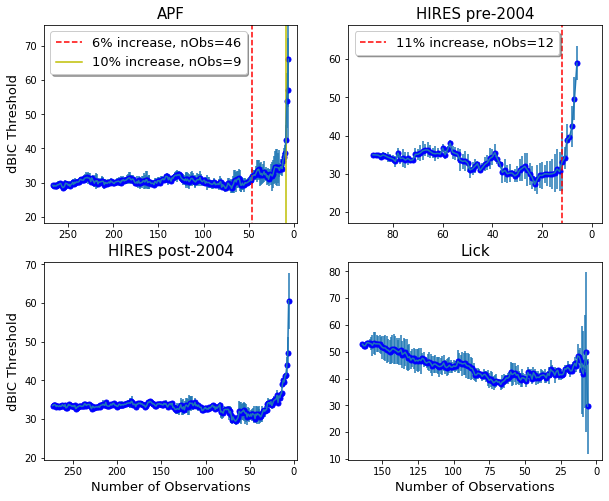

In [86]:
fig, axs = plt.subplots(2,2, figsize =(10,8))
axs[0,0].plot(x1,y1,'bo')
axs[0,0].plot((46,46),(5,80), 'r--', label = '6% increase, nObs=46')
axs[0,0].plot((9,9),(5,80), 'y-', label = '10% increase, nObs=9')
axs[0,0].set_title('APF', size =15)
axs[0,0].errorbar(x1, y1, yerr = df_avg_apf['std'])
axs[0,0].axis([max(x1)+10, min(x1)-10, min(y1)-10, max(y1)+10])
axs[0,0].legend(shadow = True, prop={'size': 13})
axs[0,0].set_ylabel('dBIC Threshold', size = 13)

axs[0,1].plot(x2,y2,'bo')
axs[0,1].set_title('HIRES pre-2004', size =15)
axs[0,1].errorbar(x2, y2, yerr = df_avg_hiresrk['std'])
axs[0,1].plot((12, 12), (10, 70), 'r--', label = '11% increase, nObs=12')
axs[0,1].axis([max(x2)+10, min(x2)-10, min(y2)-10, max(y2)+10])
axs[0,1].legend(shadow = True, prop={'size': 13})

axs[1,0].plot(x3,y3,'bo')
axs[1,0].set_title('HIRES post-2004', size =15)
axs[1,0].errorbar(x3, y3, yerr = df_avg_hiresrj['std'])
axs[1,0].axis([max(x3)+10, min(x3)-10, min(y3)-10, max(y3)+10])
axs[1,0].set_xlabel('Number of Observations', size = 13)
axs[1,0].set_ylabel('dBIC Threshold', size = 13)

axs[1,1].plot(x4,y4, 'bo')
axs[1,1].set_title('Lick', size =15)
axs[1,1].errorbar(x4, y4, yerr = df_avg_lick['std'])
axs[1,1].axis([max(x4)+10, min(x4)-10, min(y4)-20, max(y4)+30])
axs[1,1].set_xlabel('Number of Observations', size = 13)

fig.savefig('instrument_panel.png')

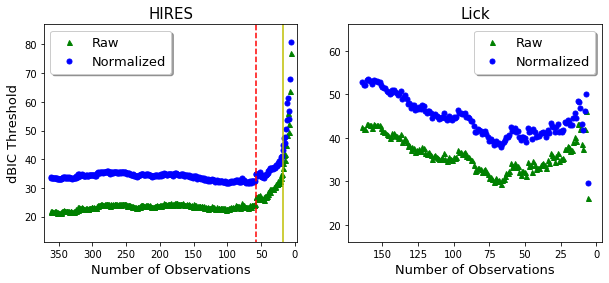

In [95]:
fig, axs = plt.subplots(1,2, figsize = (10,4))

x = df_avg_hires['nobs']
y = df_avg_hires['avg_thresholds']
axs[0].plot(x, y, 'g^', label = 'Raw')
#ax.errorbar(x, y, yerr = df_avg['std'])
axs[0].plot(df_avg_diff_hires['nobs'], df_avg_diff_hires['avg_thresholds'], 'bo', label = 'Normalized')
#ax.errorbar(df_avg_diff['nobs'], df_avg_diff['avg_thresholds'], yerr = df_avg_diff['std'])
axs[0].plot((18, 18),(10,100),'y-')
axs[0].plot((58, 58),(10,100),'r--')
axs[0].axis([max(x)+10, min(x)-10, min(y)-10, max(y)+10])
axs[0].set_xlabel('Number of Observations', size = 13)
axs[0].set_ylabel('dBIC Threshold', size = 13)
axs[0].set_title('HIRES', size = 15)
axs[0].legend(shadow = True, prop={'size': 13})

x = df_avg_lick['nobs']
y = df_avg_lick['avg_thresholds']
axs[1].plot(x, y, 'g^', label = 'Raw')
#ax.errorbar(x, y, yerr = df_avg['std'])
axs[1].plot(df_avg_diff_lick['nobs'], df_avg_diff_lick['avg_thresholds'], 'bo', label = 'Normalized')
#ax.errorbar(df_avg_diff['nobs'], df_avg_diff['avg_thresholds'], yerr = df_avg_diff['std'])
axs[1].axis([max(x)+10, min(x)-10, min(y)-10, max(y)+20])
axs[1].set_xlabel('Number of Observations', size = 13)
axs[1].set_title('Lick', size = 15)
axs[1].legend(shadow = True, prop={'size': 13})

fig.savefig('raw_norm_comparison_panel.png')